In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.preprocessing import StandardScaler
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

In [2]:
data = pd.read_csv("data/segmentation data.csv", index_col = 0)

In [3]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
data.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


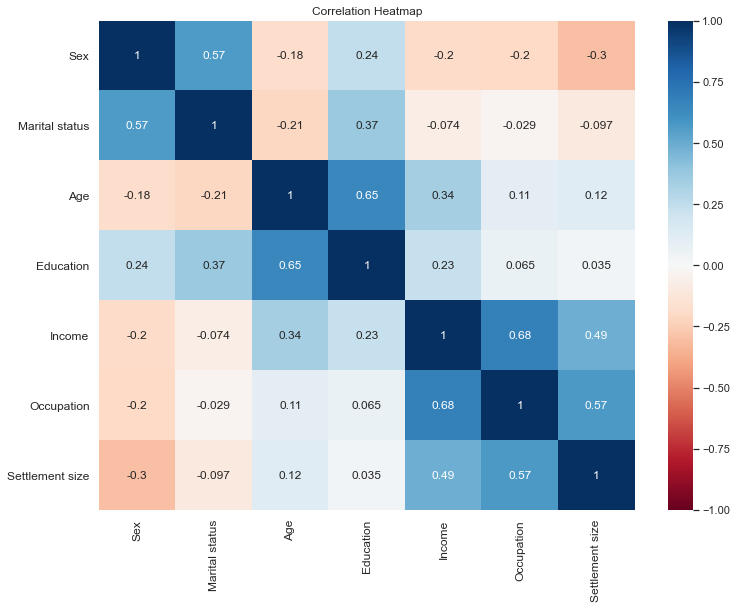

In [6]:
plt.figure(figsize=(12,9))
s = sns.heatmap(data.corr(),
               annot=True,
               cmap="RdBu",
               vmin=-1,
               vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Scatter Plot Korelasi Antara Age dan Income')

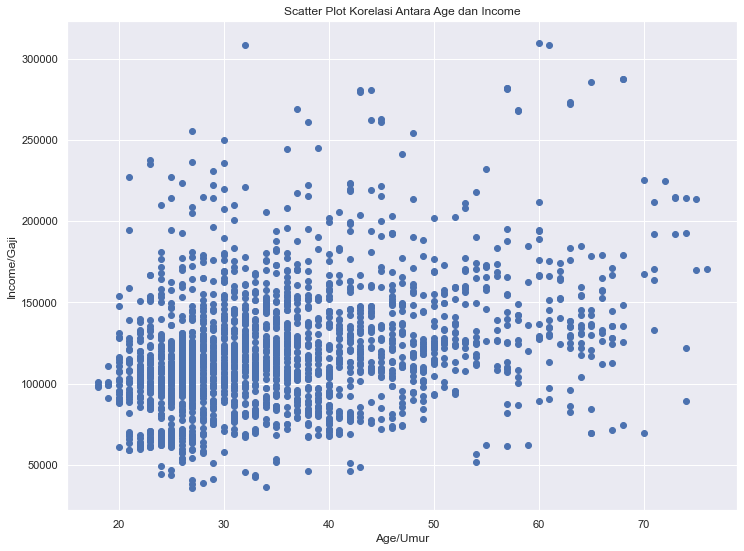

In [7]:
plt.figure(figsize=(12,9))
plt.scatter(data.iloc[:,2],data.iloc[:,4])
plt.xlabel("Age/Umur")
plt.ylabel("Income/Gaji")
plt.title("Scatter Plot Korelasi Antara Age dan Income")

In [8]:
#Standarisasai Data
scaler =StandardScaler()
data_std = scaler.fit_transform(data)

In [9]:
data_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [10]:
#Hirerki Clustering
hirarki_cluster = linkage(data_std, method='ward')

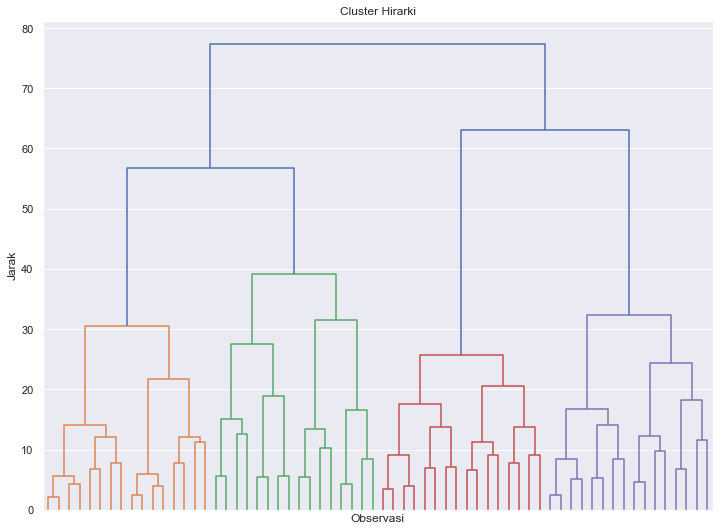

In [11]:
plt.figure(figsize=(12,9))
plt.title("Cluster Hirarki")
plt.xlabel("Observasi")
plt.ylabel("Jarak")
dendrogram(hirarki_cluster,
           truncate_mode='level',
           p=5,
           show_leaf_counts=False,
           no_labels=True
          )
plt.show()

### Menentukan Pembagian Kluster

In [12]:
#KMEANS Klusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)    

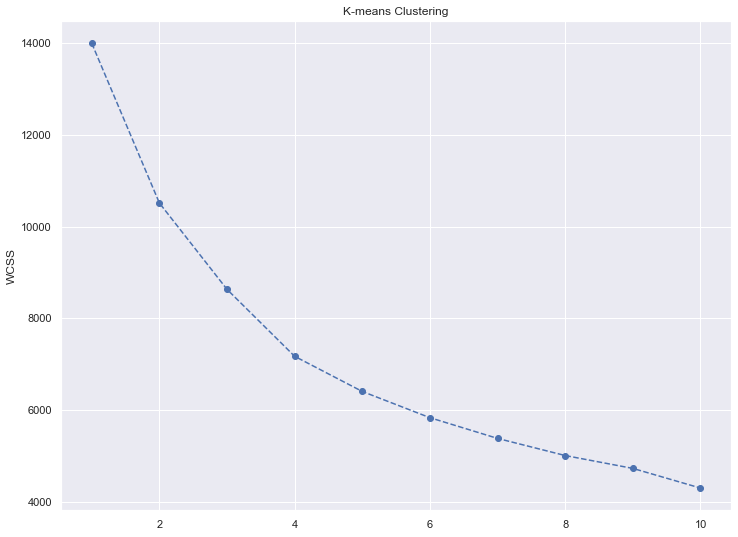

In [13]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

In [15]:
kmeans.fit(data_std)

KMeans(n_clusters=4, random_state=42)

In [17]:
#Hasil
data_kmeans = data.copy()
data_kmeans['segment'] = kmeans.labels_

In [18]:
data_kmeans_analisis = data_kmeans.groupby('segment').mean()
data_kmeans_analisis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
segment,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [20]:
data_kmeans_analisis['jumlah_customer']=data_kmeans[['segment','Sex']].groupby(['segment']).count()
data_kmeans_analisis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,jumlah_customer
segment,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570


In [21]:
data_kmeans_analisis['rata2'] = data_kmeans_analisis['jumlah_customer']/data_kmeans_analisis ['jumlah_customer'].sum()
data_kmeans_analisis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,jumlah_customer,rata2
segment,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [23]:
data_kmeans_analisis.rename({0:'Well-Off',
                         1:'Fewer-Oppotinities',
                         2:'Standard',
                         3:'Career-Focus'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,jumlah_customer,rata2
segment,,,,,,,,,
Well-Off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Fewer-Oppotinities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Career-Focus,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [24]:
data_kmeans['Labels'] = data_kmeans['segment'].map({0:'Well-Off',
                         1:'Fewer-Oppotinities',
                         2:'Standard',
                         3:'Career-Focus'})

C:\Users\ienovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


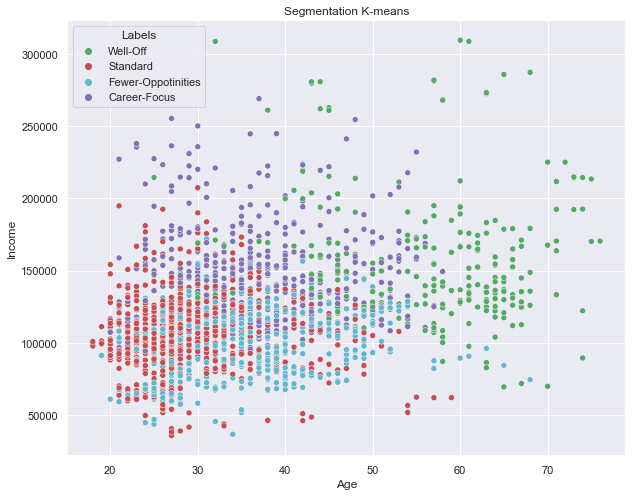

In [25]:
x_axis = data_kmeans['Age']
y_axis = data_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = data_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

### Pricipal Component Analysis

In [28]:
pca = PCA()

In [29]:
pca.fit(data_std)

PCA()

In [30]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

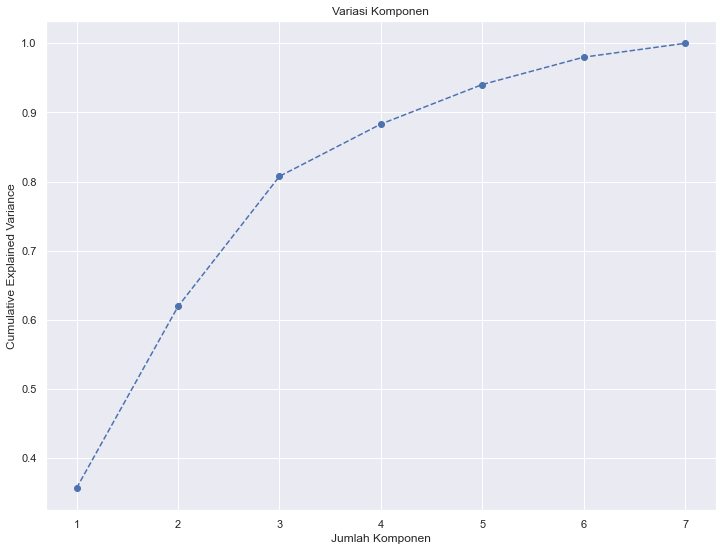

In [31]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title('Variasi Komponen')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Cumulative Explained Variance')
plt.show()
#Ambil 70-80% dari data maka ambil 3 - 4 komponen, dipilih 3 komponen

In [33]:
pca=PCA(n_components=3)

In [34]:
pca.fit(data_std)

PCA(n_components=3)

In [35]:
pca.components_
#terlihat hasil array 3x7

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [37]:
data_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,Well-Off
100000002,1,1,22,1,150773,1,2,2,Standard
100000003,0,0,49,1,89210,0,0,1,Fewer-Oppotinities
100000004,0,0,45,1,171565,1,1,3,Career-Focus
100000005,0,0,53,1,149031,1,1,3,Career-Focus
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,Fewer-Oppotinities
100001997,1,1,27,1,117744,1,0,2,Standard
100001998,0,0,31,0,86400,0,0,1,Fewer-Oppotinities


In [38]:
data_std_pca = pd.DataFrame(data=pca.components_, 
                            columns=data.columns.values, 
                            index=['Component 1','Component 2','Component 3'])
data_std_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0xce27b80>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

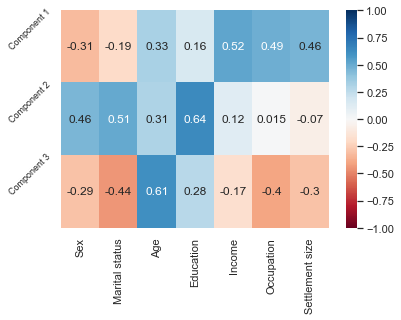

In [39]:
sns.heatmap(data_std_pca,
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [40]:
pca.transform(data_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [42]:
skor_pca = pca.transform(data_std)

In [43]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(skor_pca)
    wcss.append(kmeans_pca.inertia_)

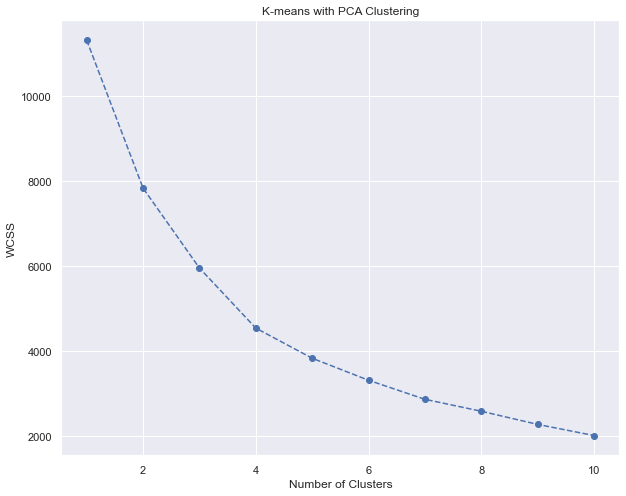

In [44]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [45]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [46]:
kmeans_pca.fit(skor_pca)

KMeans(n_clusters=4, random_state=42)

### K-Mean Clustering Dengan Hasil PCA

In [52]:
data_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(skor_pca)], axis = 1)
data_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
data_pca_kmeans['segment'] = kmeans_pca.labels_

In [53]:
data_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,segment
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [59]:
data_pca_kmeans_freq = data_pca_kmeans.groupby(['segment']).mean()
data_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
segment,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [60]:
data_pca_kmeans_freq['jumlah'] = data_pca_kmeans[['segment','Sex']].groupby(['segment']).count()
data_pca_kmeans_freq['rata2'] = data_pca_kmeans_freq['jumlah'] / data_pca_kmeans_freq['jumlah'].sum()
data_pca_kmeans_freq = data_pca_kmeans_freq.rename({0:'Standard', 
                                                          1:'Career-Focus',
                                                          2:'Fewer-Opportunity', 
                                                          3:'Well-Off'})
data_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,jumlah,rata2
segment,,,,,,,,,,,,
Standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
Career-Focus,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
Fewer-Opportunity,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
Well-Off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [61]:
data_pca_kmeans['Legend'] = data_pca_kmeans['segment'].map({0:'Standard', 
                                                          1:'Career-Focus',
                                                          2:'Fewer-Opportunity', 
                                                          3:'Well-Off'})
data_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,segment,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,Well-Off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0,Standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2,Fewer-Opportunity
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,Career-Focus
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,Career-Focus
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2,Fewer-Opportunity
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0,Standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2,Fewer-Opportunity
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0,Standard


C:\Users\ienovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


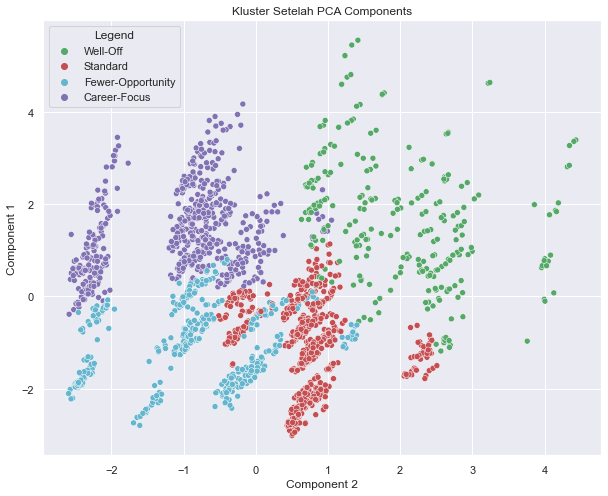

In [62]:
x_axis = data_pca_kmeans['Component 2']
y_axis = data_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = data_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Kluster Setelah PCA Components')
plt.show()

C:\Users\ienovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


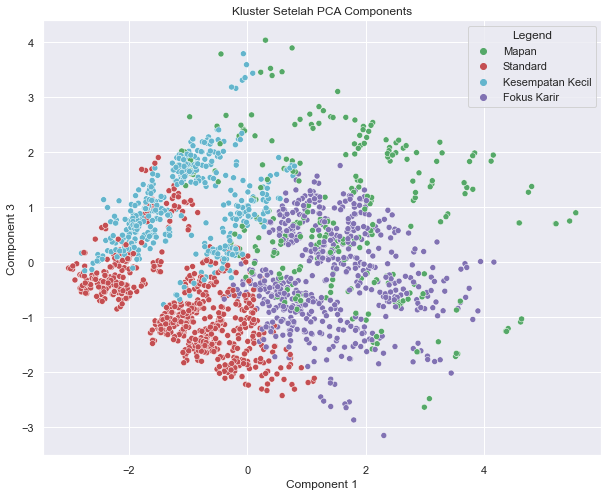

In [60]:
x_axis = data_pca_kmeans['Component 1']
y_axis = data_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = data_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Kluster Setelah PCA Components')
plt.show()

C:\Users\ienovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


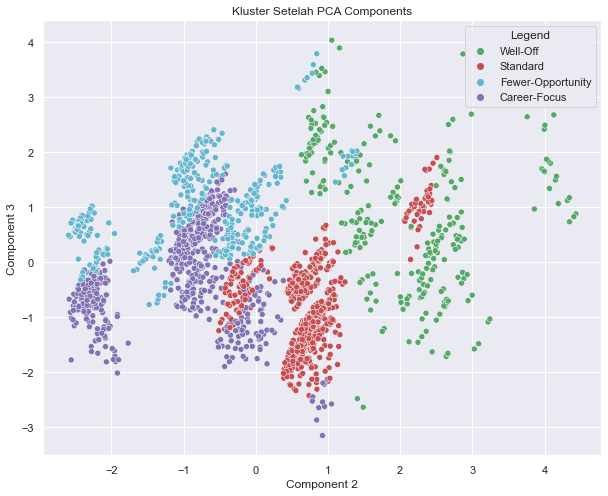

In [63]:
x_axis = data_pca_kmeans['Component 2']
y_axis = data_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = data_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Kluster Setelah PCA Components')
plt.show()

### Data Export

In [63]:
#skalar
pickle.dump(scaler,open('skalar.pickel','wb'))

In [64]:
pickle.dump(pca,open('pca.pickel','wb'))

In [65]:
pickle.dump(kmeans_pca,open('kmeans_pca.pickel','wb'))